In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sqlite3 as db
import seaborn as sns

In [2]:
df=pd.read_csv('cityforML5top.csv', header=0)
df.head()

,Incident Type,Report Hour of Day,Report Day of Week,Offense Hour of Day,Offense Day of Week,Latitude,Longitude,Zip Code Boundaries,2010 Census Tracts,Gainesville Police Districts,...,RDate,DRhour,DRmonth,Oyear,Omonth,Oday,Ryear,Rmonth,Rday,delay
0,Theft Petit - Retail,19,5,17,5,29.673875,-82.319950,4.0,12.0,4.0,...,2020-02-14,2020-02-14 19,2020-02,2020,2,14,2020,2,14,0
1,Theft Petit - Retail,16,5,0,6,29.661941,-82.300747,9.0,14.0,2.0,...,2020-02-14,2020-02-14 16,2020-02,2020,1,11,2020,2,14,33
2,Theft Petit - Other,9,3,12,2,29.646612,-82.292538,9.0,14.0,2.0,...,2019-12-04,2019-12-04 09,2019-12,2019,11,26,2019,12,4,8
3,Theft Petit - Retail,10,3,10,3,29.624934,-82.377930,2.0,32.0,12.0,...,2019-12-04,2019-12-04 10,2019-12,2019,12,4,2019,12,4,0
4,Theft Petit - Retail,10,3,10,3,29.661941,-82.300747,9.0,14.0,2.0,...,2019-12-04,2019-12-04 10,2019-12,2019,12,4,2019,12,4,0


In [3]:
set(df['Incident Type'])

{'Burglary to Conveyance',
 'Criminal Mischief (misdemeanor)',
 'Theft Petit - Other',
 'Theft Petit - Retail',
 'Trespass Warning'}

In [4]:
df.shape

(35027, 27)

In [5]:
df=df[df['Incident Type']=='Theft Petit - Retail']

In [6]:
df=df.rename(columns={"Incident Type": "Incident_Type"})

In [7]:
df=df.rename(columns={'Report Day of Week': 'Report_Day_of_Week', 'Report Hour of Day':'Report_Hour_of_Day',
'Offense Hour of Day': 'Offense_Hour_of_Day', 'Offense Day of Week': 'Offense_Day_of_Week'})


In [8]:
df.columns

Index(['Incident_Type', 'Report_Hour_of_Day', 'Report_Day_of_Week',
       'Offense_Hour_of_Day', 'Offense_Day_of_Week', 'Latitude', 'Longitude',
       'Zip Code Boundaries', '2010 Census Tracts',
       'Gainesville Police Districts', 'Florida Census Zip Codes',
       'Gainesville Fire Response Districts', 'OffenseDate', 'ReportDate',
       'ODate', 'DOhour', 'DOmonth', 'RDate', 'DRhour', 'DRmonth', 'Oyear',
       'Omonth', 'Oday', 'Ryear', 'Rmonth', 'Rday', 'delay'],
      dtype='object')

In [9]:
conn = db.connect('df_trial.db')
#c = conn.cursor()
df.to_sql('df', conn, if_exists='replace', index=False)
pd.read_sql_query('SELECT * FROM df LIMIT 2', conn)

D:\Program\Anaconda3\lib\site-packages\pandas\core\generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


,Incident_Type,Report_Hour_of_Day,Report_Day_of_Week,Offense_Hour_of_Day,Offense_Day_of_Week,Latitude,Longitude,Zip Code Boundaries,2010 Census Tracts,Gainesville Police Districts,...,RDate,DRhour,DRmonth,Oyear,Omonth,Oday,Ryear,Rmonth,Rday,delay
0,Theft Petit - Retail,19,5,17,5,29.673875,-82.319950,4.0,12.0,4.0,...,2020-02-14,2020-02-14 19,2020-02,2020,2,14,2020,2,14,0
1,Theft Petit - Retail,16,5,0,6,29.661941,-82.300747,9.0,14.0,2.0,...,2020-02-14,2020-02-14 16,2020-02,2020,1,11,2020,2,14,33



Five random records from the `dfReport_Hour_of_Day` table:


,Report_Hour_of_Day,countReport_Hour_of_Day
5,5,49
12,12,590
15,15,840
8,8,106
8,8,106


Text(0.5, 1.0, 'Time Series of count by Report_Hour_of_Day')

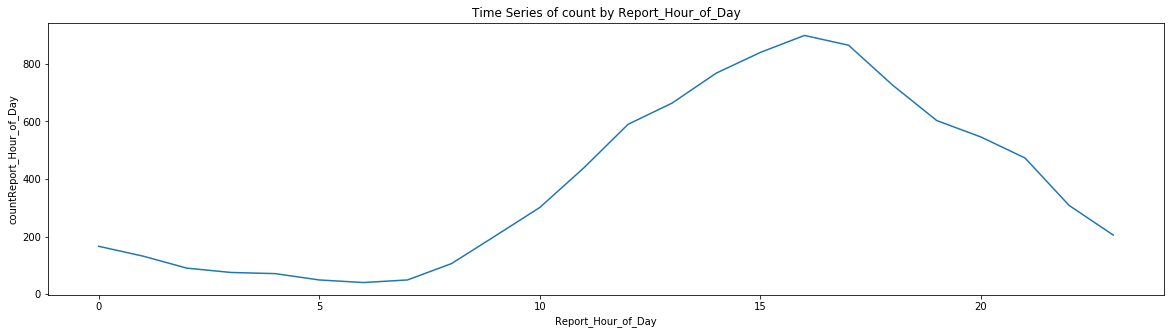

In [10]:
query = '''
    select  Report_Hour_of_Day, count(Incident_Type) as countReport_Hour_of_Day    
    from df
    where Oyear!=2020
    group by Report_Hour_of_Day
    order by Report_Hour_of_Day
'''
dfReport_Hour_of_Day = pd.read_sql_query (query, conn)
### END SOLUTION

# Show your solution:
print ("\nFive random records from the `dfReport_Hour_of_Day` table:")
display(dfReport_Hour_of_Day.iloc[np.random.choice (len (dfReport_Hour_of_Day), 5)])
plt.figure(figsize=(20,5))
g=sns.lineplot(x='Report_Hour_of_Day', y='countReport_Hour_of_Day', data=dfReport_Hour_of_Day)
g.set_title('Time Series of count by Report_Hour_of_Day')


Five random records from the `dfReport_Day_of_Week` table:


,Report_Day_of_Week,countReport_Day_of_Week
0,1,1327
3,4,1258
1,2,1275
0,1,1327
5,6,1435


Text(0.5, 1.0, 'Time Series of count by Report_Day_of_Week')

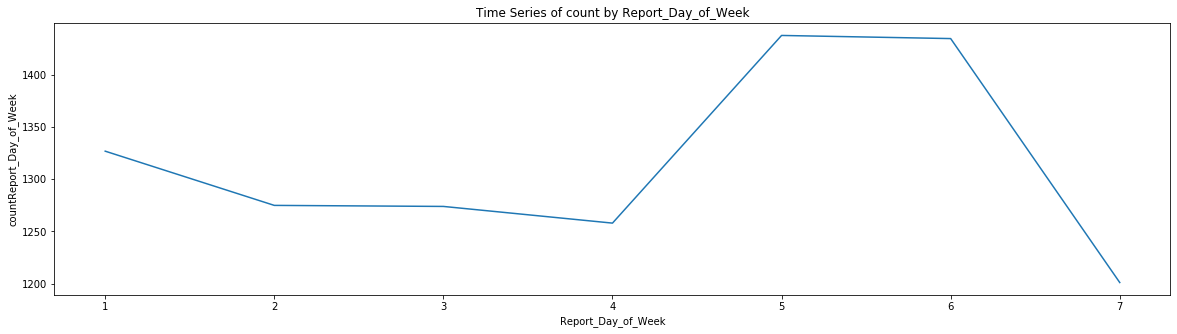

In [11]:
query = '''
    select  Report_Day_of_Week, count(Incident_Type) as countReport_Day_of_Week    
    from df 
    where Oyear!=2020
    group by Report_Day_of_Week
    order by Report_Day_of_Week
'''
dfReport_Day_of_Week = pd.read_sql_query (query, conn)
### END SOLUTION

# Show your solution:
print ("\nFive random records from the `dfReport_Day_of_Week` table:")
display(dfReport_Day_of_Week.iloc[np.random.choice (len (dfReport_Day_of_Week), 5)])
plt.figure(figsize=(20,5))
g=sns.lineplot(x='Report_Day_of_Week', y='countReport_Day_of_Week', data=dfReport_Day_of_Week)
g.set_title('Time Series of count by Report_Day_of_Week')

In [12]:
query = '''
    select  RDate, count(Incident_Type) as countRdate    
    from df 
     where Oyear!=2020 and Oyear!=2019
    group by RDate
    order by RDate
'''
dfRDate = pd.read_sql_query (query, conn)
### END SOLUTION

# Show your solution:
print ("\nFive random records from the `dfRDate` table:")
display(dfRDate.iloc[np.random.choice (len (dfRDate), 5)])


Five random records from the `dfRDate` table:


,RDate,countRdate
907,2013-09-20,3
1142,2014-06-09,3
1080,2014-03-27,4
2259,2017-09-26,1
2025,2017-01-20,3


In [13]:
query = '''
    select  RDate, count(Incident_Type) as countRdate    
    from df 
    where Oyear=2020 or Oyear=2019
    group by RDate
    order by RDate
'''
testfull = pd.read_sql_query (query, conn)
### END SOLUTION


In [14]:
testfull

,RDate,countRdate
0,2019-01-01,2
1,2019-01-02,1
2,2019-01-03,3
3,2019-01-04,2
4,2019-01-05,1
...,...,...
407,2020-03-31,3
408,2020-04-01,3
409,2020-04-03,1
410,2020-04-05,3


Text(0.5, 1.0, 'Time Series of Theft Petit - Retail by Rdate of search')

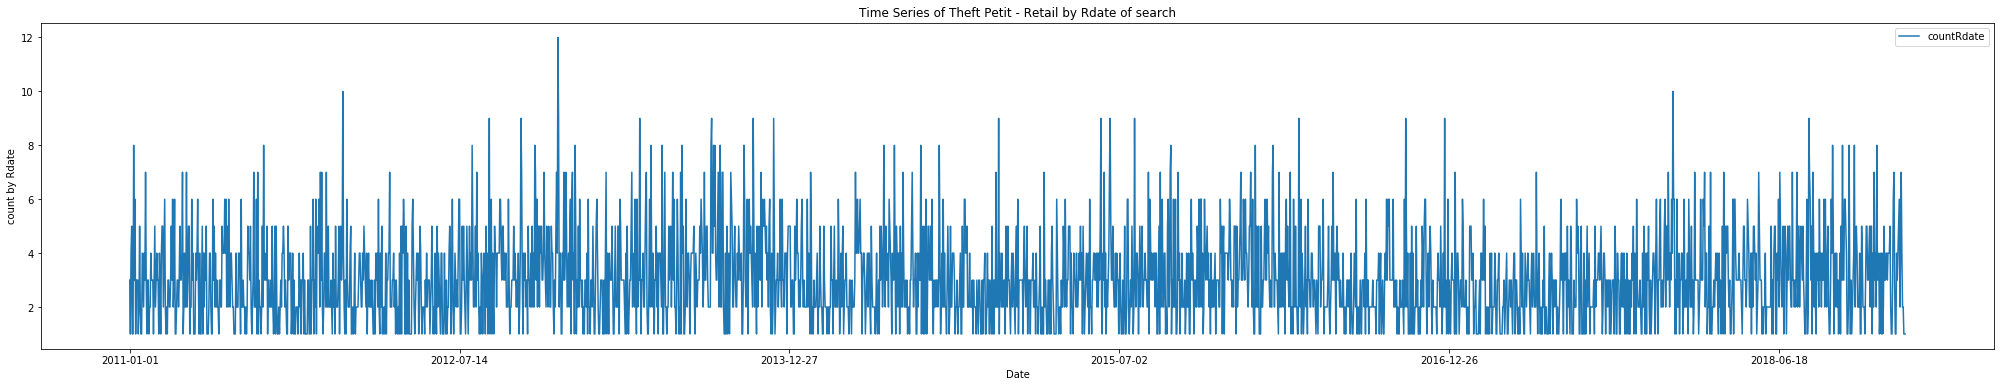

In [15]:
dfRDate.plot(x="RDate", y='countRdate', figsize=(35,6))
plt.xlabel('Date')
plt.ylabel('count by Rdate')
plt.title('Time Series of Theft Petit - Retail by Rdate of search')



Five random records from the `dfDRmonth` table:


,DRmonth,countDRmonth
65,2016-06,91
59,2015-12,99
10,2011-11,95
10,2011-11,95
72,2017-01,90


Text(0.5, 1.0, 'Time Series of Theft Petit - Retail byDRmonth of search')

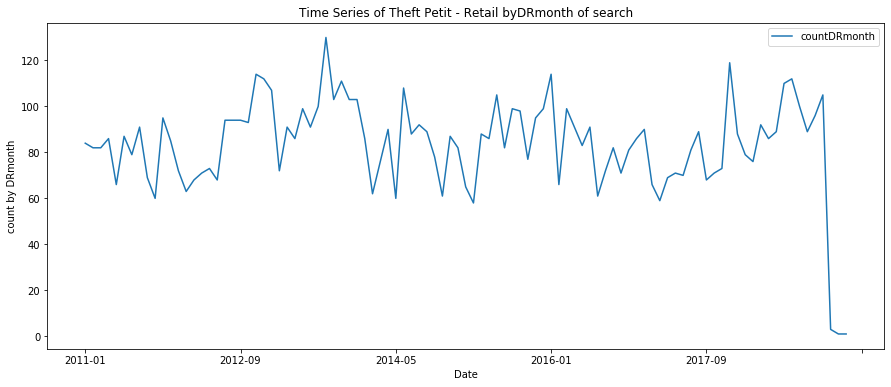

In [16]:
query = '''
    select  DRmonth, count(Incident_Type) as countDRmonth    
    from df 
    where Oyear!=2020 and Oyear!=2019
    
    group by  DRmonth
    order by DRmonth
'''
dfDRmonth = pd.read_sql_query (query, conn)
### END SOLUTION

# Show your solution:
print ("\nFive random records from the `dfDRmonth` table:")
display(dfDRmonth.iloc[np.random.choice (len (dfDRmonth), 5)])
dfDRmonth.plot(x="DRmonth", y='countDRmonth', figsize=(15,6))
plt.xlabel('Date')
plt.ylabel('count by DRmonth')
plt.title('Time Series of Theft Petit - Retail byDRmonth of search')

In [17]:
dfDRmonthindex=dfDRmonth.set_index('DRmonth')

In [18]:
query = '''
    select  DRmonth, count(Incident_Type) as countDRmonth    
    from df 
    where Oyear=2020 or Oyear=2019
    
    group by  DRmonth
    order by DRmonth
'''
testmonth = pd.read_sql_query (query, conn)
### END SOLUTION


In [19]:
testmonth=testmonth.set_index('DRmonth')
testmonth=testmonth.sort_index(ascending=True)

In [20]:
import matplotlib.pyplot as plt
from fbprophet import Prophet
import altair as alt
import plotly as plotly
def fit_predict_model(dataframe, interval_width = 0.99, changepoint_range = 0.8):
    m = Prophet(daily_seasonality = False, yearly_seasonality = False, weekly_seasonality = False,
                seasonality_mode = 'multiplicative', 
                interval_width = interval_width,
                changepoint_range = changepoint_range)
    m = m.fit(dataframe)
    forecast = m.predict(dataframe)
    forecast['fact'] = dataframe['y'].reset_index(drop = True)
    return forecast

def detect_anomalies(forecast):
    forecasted = forecast[['ds','trend', 'yhat', 'yhat_lower', 'yhat_upper', 'fact']].copy()
    #forecast['fact'] = df['y']

    forecasted['anomaly'] = 0
    forecasted.loc[forecasted['fact'] > forecasted['yhat_upper'], 'anomaly'] = 1
    forecasted.loc[forecasted['fact'] < forecasted['yhat_lower'], 'anomaly'] = -1

    #anomaly importances
    forecasted['importance'] = 0
    forecasted.loc[forecasted['anomaly'] ==1, 'importance'] = \
        (forecasted['fact'] - forecasted['yhat_upper'])/forecast['fact']
    forecasted.loc[forecasted['anomaly'] ==-1, 'importance'] = \
        (forecasted['yhat_lower'] - forecasted['fact'])/forecast['fact']
    
    return forecasted
    
def plot_anomalies(forecasted):
    interval = alt.Chart(forecasted).mark_area(interpolate="basis", color = '#7FC97F').encode(
    x=alt.X('ds:T',  title ='date'),
    y='yhat_upper',
    y2='yhat_lower',
    tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive().properties(
        title='Anomaly Detection'
    )

    fact = alt.Chart(forecasted[forecasted.anomaly==0]).mark_circle(size=15, opacity=0.7, color = 'Black').encode(
        x='ds:T',
        y=alt.Y('fact', title='Theft Petit - Retail_count'),    
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive()

    anomalies = alt.Chart(forecasted[forecasted.anomaly!=0]).mark_circle(size=30, color = 'Red').encode(
        x='ds:T',
        y=alt.Y('fact', title='Theft Petit - Retail_count'),    
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper'],
        size = alt.Size( 'importance', legend=None)
    ).interactive()

    return alt.layer(interval, fact, anomalies)\
              .properties(width=870, height=450)\
              .configure_title(fontSize=20)


In [21]:
df0s=dfRDate.copy()
df0s=df0s.rename(columns={"RDate": "ds", "countRdate": "y"})
pred = fit_predict_model(df0s)
pred = detect_anomalies(pred)
plot_anomalies(pred)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


alt.LayerChart(...)

In [22]:
train=dfDRmonthindex.copy()
test=testmonth.copy()
test=test.sort_index(ascending=True)

In [23]:
#decompose data
import warnings
warnings.simplefilter('ignore');
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
# Multiplicative Decomposition 
#result_mul = seasonal_decompose(train, model='multiplicative', freq=1)
# Additive Decomposition
result_add = seasonal_decompose(train, model='additive', freq=1)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

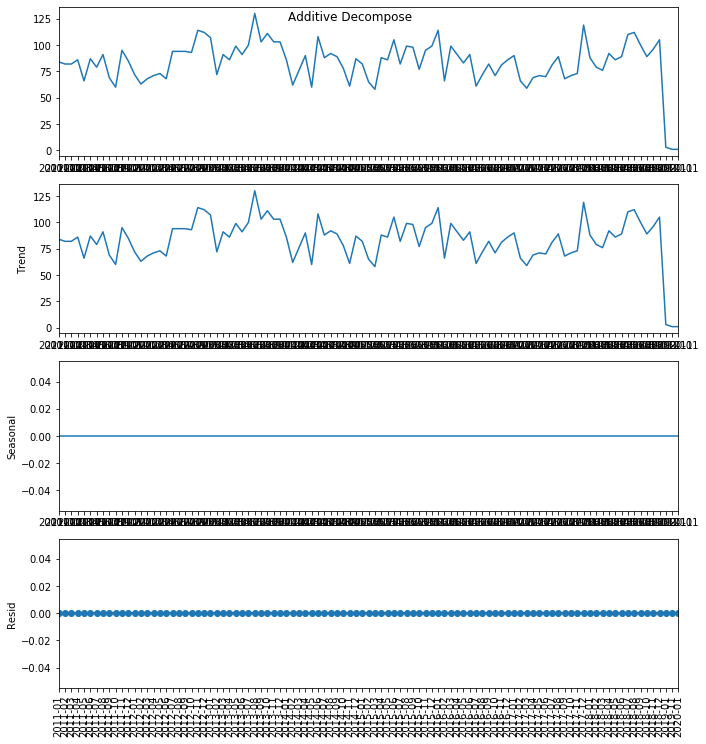

In [24]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
#fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
#result_mul.plot().suptitle('Multiplicative Decompose')
#plt.xticks(rotation=90)
result_add.plot().suptitle('Additive Decompose')
plt.xticks(rotation=90)
plt.show()

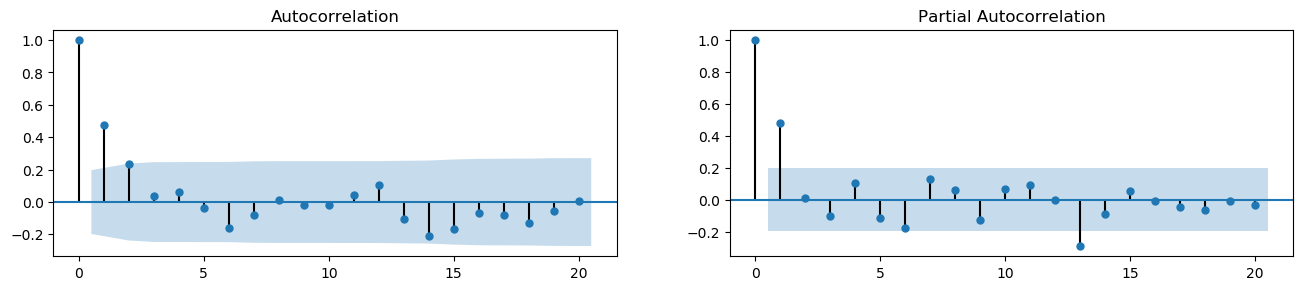

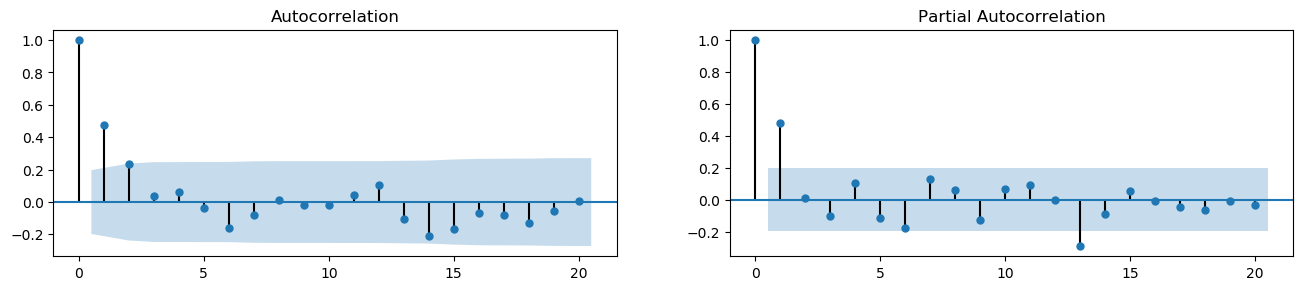

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(train, ax=axes[0])
plot_pacf(train,  ax=axes[1])

In [26]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [27]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2956      0.421     -0.703      0.482      -1.120       0.529
ma.L1         -0.1672      0.435     -0.384      0.701      -1.020       0.685
ar.S.L12       0.0016      0.130      0.013      0.990      -0.253       0.257
ma.S.L12      -1.0000   1797.156     -0.001      1.000   -3523.360    3521.360
sigma2       275.3818   4.95e+05      0.001      1.000    -9.7e+05     9.7e+05


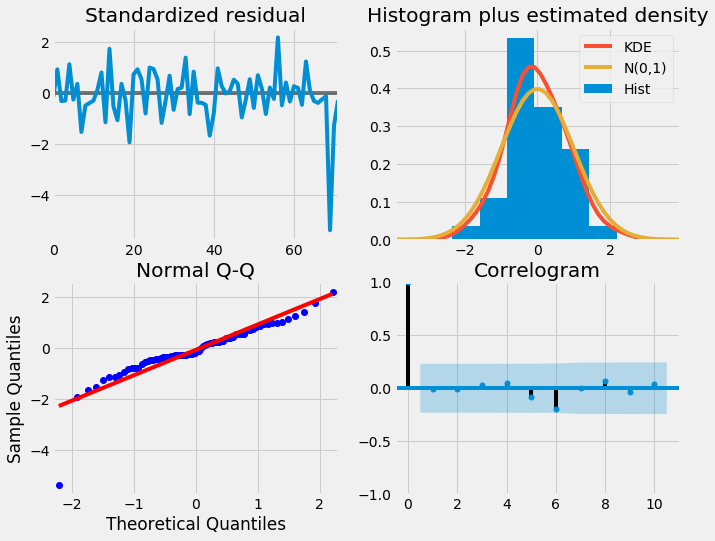

In [28]:
results.plot_diagnostics(figsize=(10, 8))
plt.show()

In [29]:
# Build Model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train, order=(3,2,1))  
#model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=False)  
print(fitted.summary())
# Forecast
fc, se, conf = fitted.forecast(16, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

                             ARIMA Model Results                              
Dep. Variable:        D2.countDRmonth   No. Observations:                   97
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -422.522
Method:                       css-mle   S.D. of innovations             18.289
Date:                Sat, 25 Jul 2020   AIC                            857.045
Time:                        10:31:41   BIC                            872.493
Sample:                             2   HQIC                           863.291
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0484      0.038     -1.279      0.201      -0.122       0.026
ar.L1.D2.countDRmonth    -0.4016      0.101     -3.974      0.000      -0.600      -0.204
ar.L2.D2

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

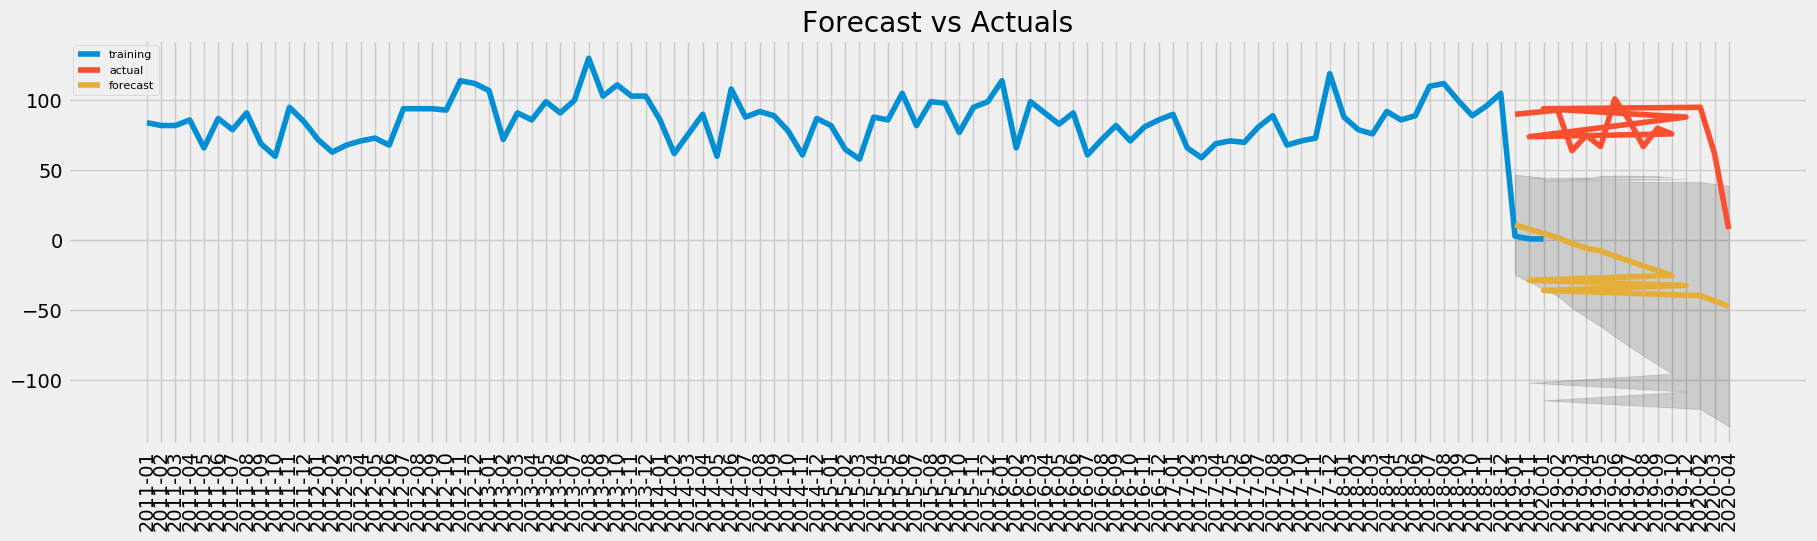

In [30]:
# Plot
plt.figure(figsize=(20,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.xticks(rotation=90)
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, fc_series)
print('Test MSE: %.3f' % error)


Test MSE: 9718.245
